Contamination: 200

Classification Report:
               precision    recall  f1-score   support

      Normal       0.52      0.53      0.52      2498
       Relay       0.44      0.43      0.43      2166

    accuracy                           0.48      4664
   macro avg       0.48      0.48      0.48      4664
weighted avg       0.48      0.48      0.48      4664



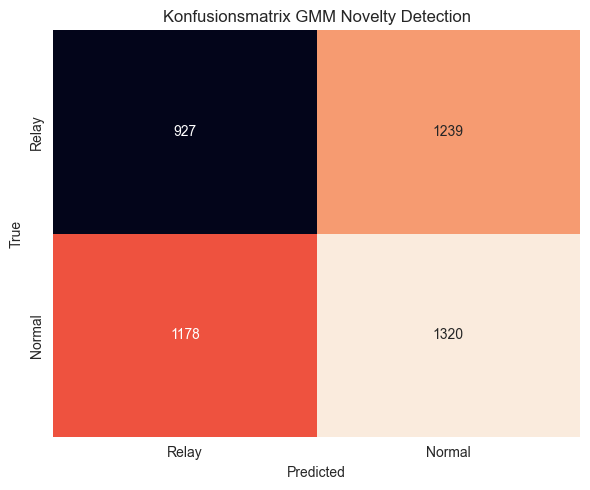

Contamination: 50

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.52      0.52      2498
       Relay       0.43      0.42      0.42      2166

    accuracy                           0.47      4664
   macro avg       0.47      0.47      0.47      4664
weighted avg       0.47      0.47      0.47      4664



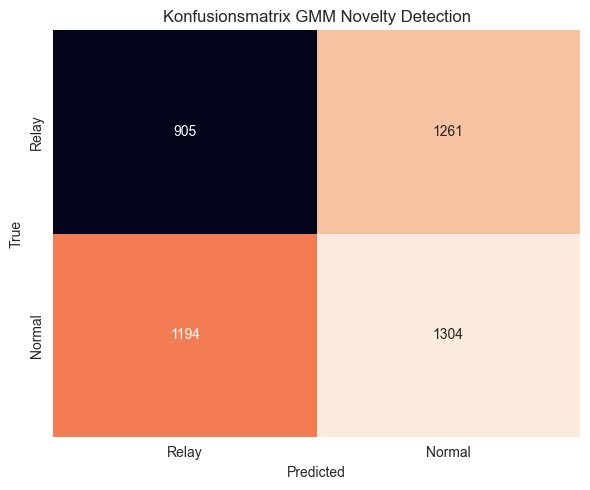

Contamination: 100

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.52      0.52      2498
       Relay       0.44      0.43      0.43      2166

    accuracy                           0.48      4664
   macro avg       0.47      0.47      0.47      4664
weighted avg       0.48      0.48      0.48      4664



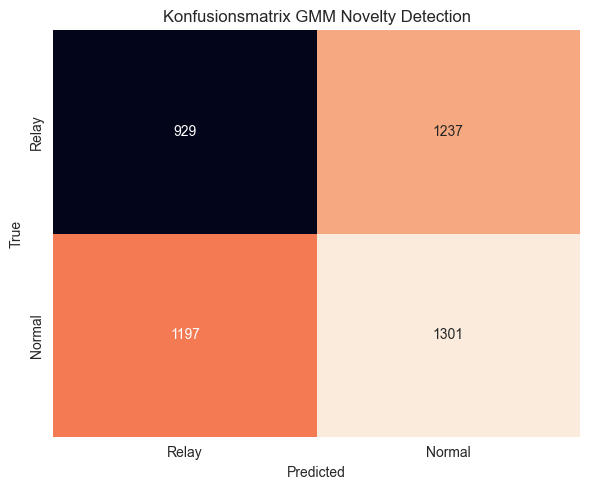

Contamination: 150

Classification Report:
               precision    recall  f1-score   support

      Normal       0.52      0.52      0.52      2498
       Relay       0.45      0.45      0.45      2166

    accuracy                           0.49      4664
   macro avg       0.49      0.49      0.49      4664
weighted avg       0.49      0.49      0.49      4664



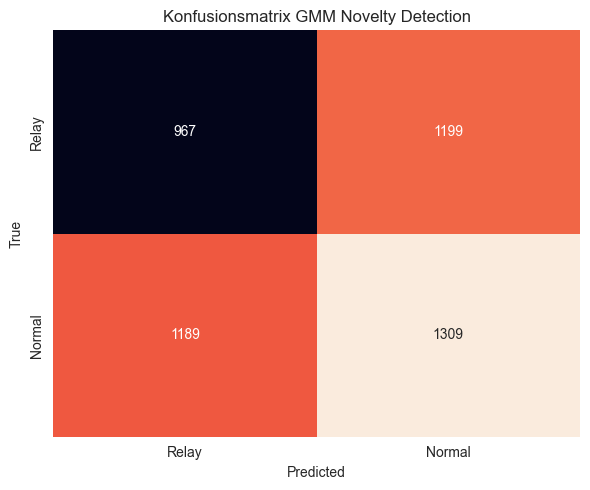

'SCALED DATEN AM BESTEN'

In [17]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from pyod.models.iforest import IForest

# daten laden
normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File('datasets/transients_cleaned_padded.h5', 'r') as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49998, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49998):
        dataset_normal[i] = normal_group[str(i)][:]
    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = StandardScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]      # 4998 Normal
X_test_relay          = dataset_relay[47500:]        # 4998 Relay

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
for i in {50, 100, 150, 200}:
    clf = IForest(contamination=len(X_test_relay)/len(X_test_combined), n_estimators=i)
    clf.fit(X_train_scaled)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined_scaled)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
    print(f"Contamination: {i}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix GMM Novelty Detection")
    plt.tight_layout()
    plt.show()

"""SCALED DATEN AM BESTEN"""

Contamination: 200

Classification Report:
               precision    recall  f1-score   support

      Normal       0.49      0.50      0.50      4998
       Relay       0.45      0.44      0.45      4666

    accuracy                           0.47      9664
   macro avg       0.47      0.47      0.47      9664
weighted avg       0.47      0.47      0.47      9664



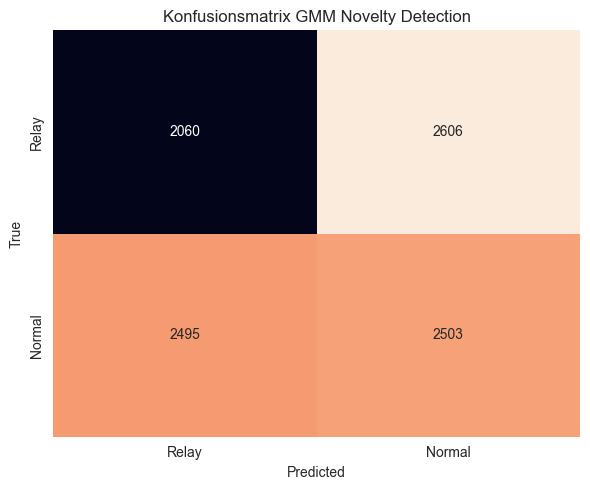

Contamination: 50

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      0.51      0.50      4998
       Relay       0.46      0.46      0.46      4666

    accuracy                           0.48      9664
   macro avg       0.48      0.48      0.48      9664
weighted avg       0.48      0.48      0.48      9664



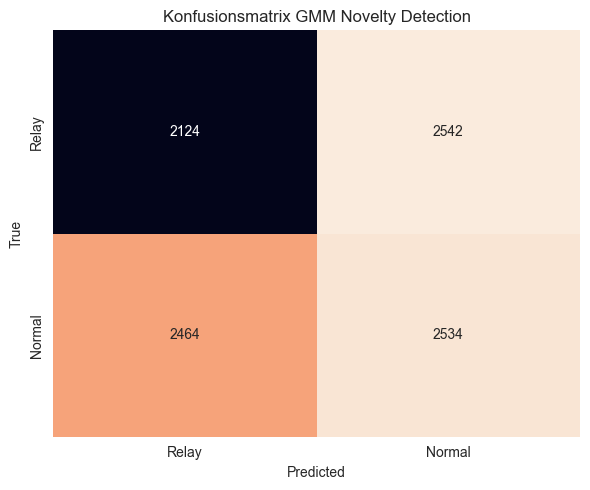

Contamination: 100

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      0.50      0.50      4998
       Relay       0.47      0.47      0.47      4666

    accuracy                           0.48      9664
   macro avg       0.48      0.48      0.48      9664
weighted avg       0.48      0.48      0.48      9664



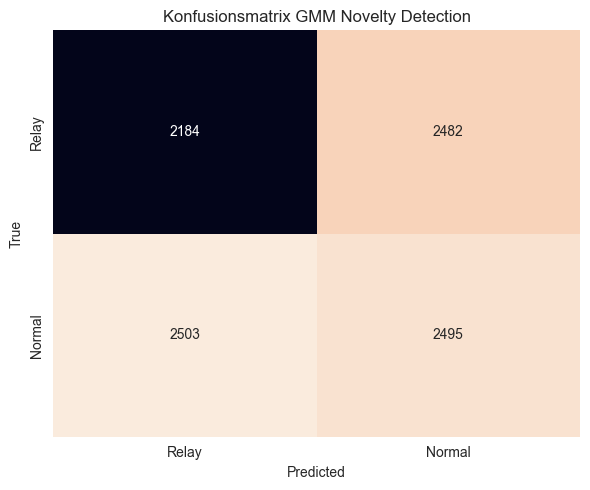

Contamination: 150

Classification Report:
               precision    recall  f1-score   support

      Normal       0.49      0.50      0.49      4998
       Relay       0.45      0.44      0.45      4666

    accuracy                           0.47      9664
   macro avg       0.47      0.47      0.47      9664
weighted avg       0.47      0.47      0.47      9664



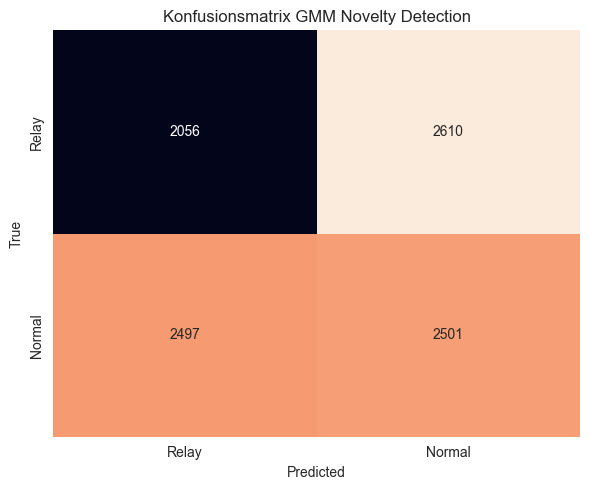

In [16]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from pyod.models.iforest import IForest

# daten laden
normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File('datasets/transients_cleaned_padded.h5', 'r') as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49998, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49998):
        dataset_normal[i] = normal_group[str(i)][:]
    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = StandardScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]      # 4998 Normal
X_test_relay          = dataset_relay[47500:]        # 4998 Relay

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
for i in {50, 100, 150, 200}:
    clf = IForest(contamination=len(X_test_relay)/len(X_test_combined), n_estimators=i)
    clf.fit(X_train)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(f"Contamination: {i}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix GMM Novelty Detection")
    plt.tight_layout()
    plt.show()

    """SCALED DATEN AM BESTEN"""

0.4644082332761578
N_Bins: 50

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2498
       Relay       0.81      0.04      0.07      2166

    accuracy                           0.55      4664
   macro avg       0.68      0.51      0.39      4664
weighted avg       0.67      0.55      0.41      4664



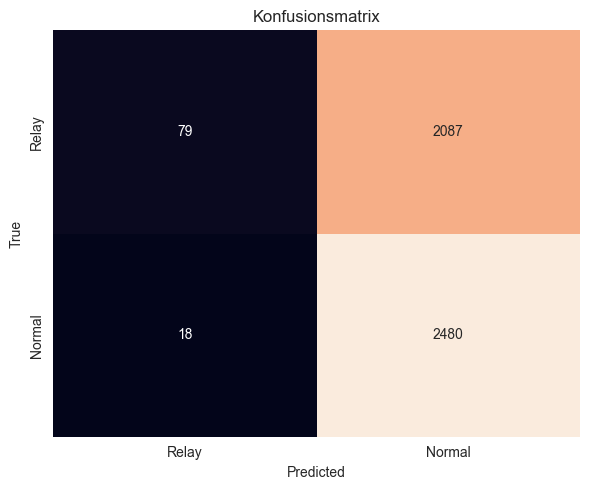

N_Bins: 100

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2498
       Relay       0.71      0.03      0.06      2166

    accuracy                           0.54      4664
   macro avg       0.63      0.51      0.38      4664
weighted avg       0.62      0.54      0.40      4664



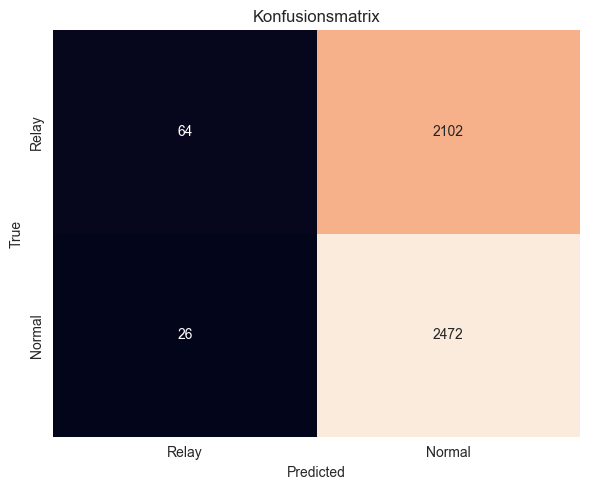

N_Bins: 300

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2498
       Relay       0.75      0.04      0.07      2166

    accuracy                           0.55      4664
   macro avg       0.65      0.51      0.39      4664
weighted avg       0.64      0.55      0.41      4664



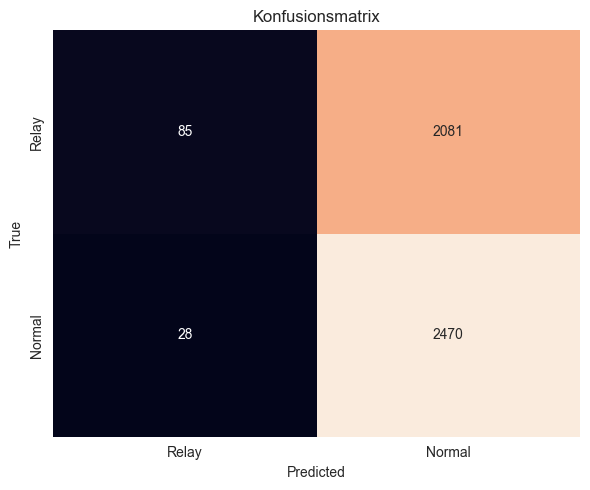

In [18]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from pyod.models.iforest import IForest

# daten laden
normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File('datasets/transients_cleaned_padded.h5', 'r') as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49998, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49998):
        dataset_normal[i] = normal_group[str(i)][:]
    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = MinMaxScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]      # 4998 Normal
X_test_relay          = dataset_relay[47500:]        # 4998 Relay

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

print(len(X_test_relay)/len(X_test_combined))
# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
for n in {50,100,300}:
    clf = IForest(contamination=0.01, n_estimators=n, behaviour="new")
    clf.fit(X_train)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(f"N_Bins: {n}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()

0.4644082332761578
N_Bins: 50

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2498
       Relay       0.71      0.03      0.05      2166

    accuracy                           0.54      4664
   macro avg       0.63      0.51      0.37      4664
weighted avg       0.62      0.54      0.40      4664



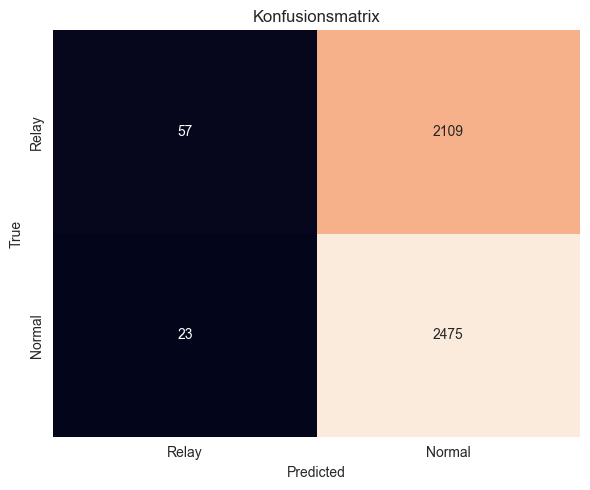

N_Bins: 100

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2498
       Relay       0.80      0.03      0.06      2166

    accuracy                           0.55      4664
   macro avg       0.67      0.51      0.38      4664
weighted avg       0.66      0.55      0.40      4664



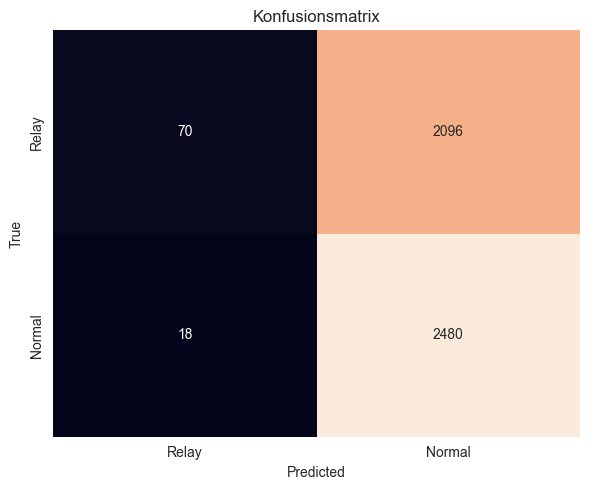

N_Bins: 300

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2498
       Relay       0.75      0.04      0.08      2166

    accuracy                           0.55      4664
   macro avg       0.65      0.52      0.39      4664
weighted avg       0.64      0.55      0.41      4664



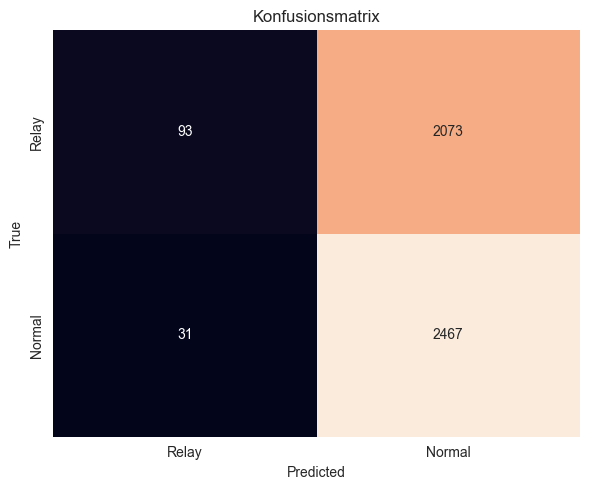

In [19]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from pyod.models.iforest import IForest

# daten laden
normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File('datasets/transients_cleaned_padded.h5', 'r') as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49998, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49998):
        dataset_normal[i] = normal_group[str(i)][:]
    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = StandardScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]      # 4998 Normal
X_test_relay          = dataset_relay[47500:]        # 4998 Relay

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

print(len(X_test_relay)/len(X_test_combined))
# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
for n in {50,100,300}:
    clf = IForest(contamination=0.01, n_estimators=n, behaviour="new")
    clf.fit(X_train_scaled)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined_scaled)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(f"N_Bins: {n}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()

0.4644082332761578
N_Bins: 50

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2498
       Relay       0.79      0.03      0.06      2166

    accuracy                           0.55      4664
   macro avg       0.66      0.51      0.38      4664
weighted avg       0.66      0.55      0.40      4664



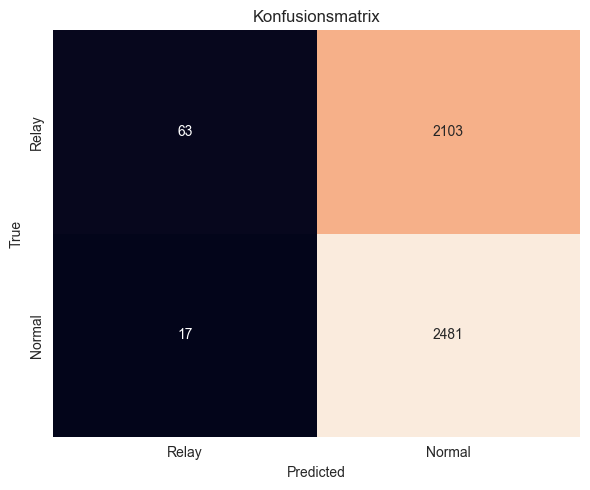

N_Bins: 100

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2498
       Relay       0.71      0.03      0.06      2166

    accuracy                           0.54      4664
   macro avg       0.63      0.51      0.38      4664
weighted avg       0.62      0.54      0.40      4664



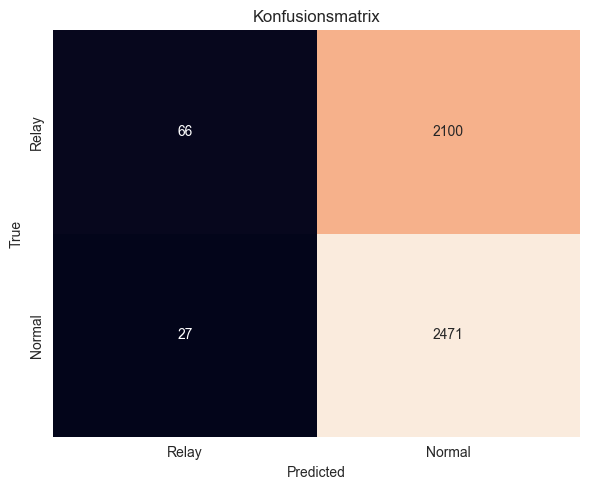

N_Bins: 300

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2498
       Relay       0.75      0.04      0.07      2166

    accuracy                           0.55      4664
   macro avg       0.64      0.51      0.38      4664
weighted avg       0.64      0.55      0.41      4664



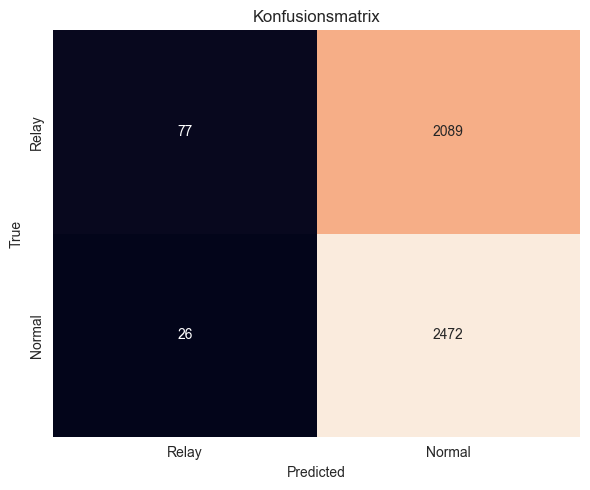

In [20]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from pyod.models.iforest import IForest

# daten laden
normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File('datasets/transients_cleaned_padded.h5', 'r') as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49998, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49998):
        dataset_normal[i] = normal_group[str(i)][:]
    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = MinMaxScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]      # 4998 Normal
X_test_relay          = dataset_relay[47500:]        # 4998 Relay

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

print(len(X_test_relay)/len(X_test_combined))
# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
for n in {50,100,300}:
    clf = IForest(contamination=0.01, n_estimators=n, behaviour="new")
    clf.fit(X_train_scaled)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined_scaled)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(f"N_Bins: {n}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()

0.4644082332761578
N_Bins: 50

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2498
       Relay       0.69      0.03      0.06      2166

    accuracy                           0.54      4664
   macro avg       0.61      0.51      0.38      4664
weighted avg       0.61      0.54      0.40      4664



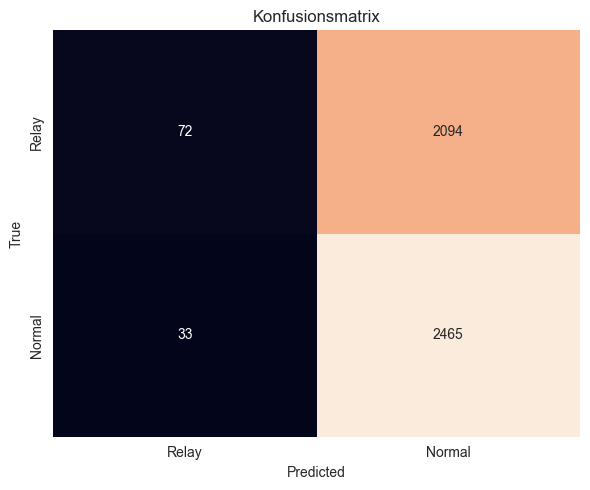

N_Bins: 100

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2498
       Relay       0.72      0.03      0.05      2166

    accuracy                           0.54      4664
   macro avg       0.63      0.51      0.38      4664
weighted avg       0.62      0.54      0.40      4664



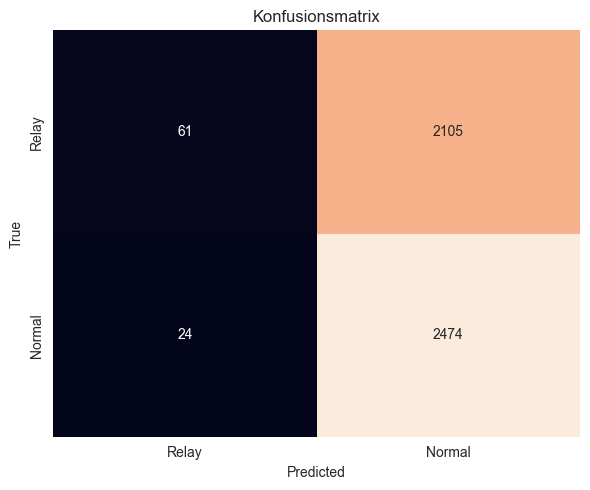

N_Bins: 300

Classification Report:
               precision    recall  f1-score   support

      Normal       0.54      0.99      0.70      2498
       Relay       0.75      0.04      0.08      2166

    accuracy                           0.55      4664
   macro avg       0.65      0.51      0.39      4664
weighted avg       0.64      0.55      0.41      4664



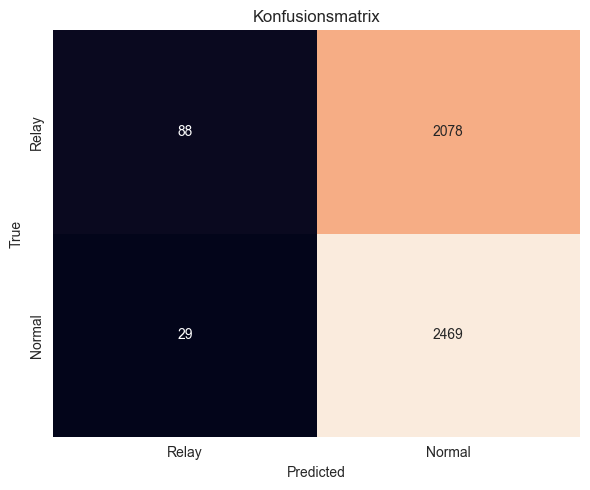

In [21]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from pyod.models.iforest import IForest

# daten laden
normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File('datasets/transients_cleaned_padded.h5', 'r') as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49998, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49998):
        dataset_normal[i] = normal_group[str(i)][:]
    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

# daten definieren und skalieren
scaler = StandardScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]      # 4998 Normal
X_test_relay          = dataset_relay[47500:]        # 4998 Relay

scaler.fit(X_train)
X_train_scaled        = scaler.transform(X_train)
X_test_norm_scaled    = scaler.transform(X_test_normal)
X_test_relay_scaled   = scaler.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled = np.vstack((X_test_norm_scaled, X_test_relay_scaled))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

print(len(X_test_relay)/len(X_test_combined))
# modell trainieren, contamination gibt an, wie viele outlier man im trainigsdatensatz hat
# contamination kann man bei reiner novelty detection zb auf 0.01 oder 0.05 setzen
for n in {50,100,300}:
    clf = IForest(contamination=0.01, n_estimators=n)
    clf.fit(X_train_scaled)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined_scaled)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(f"N_Bins: {n}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()